## CMPINF 2100 - Final project feedback

### University of Pittsburgh: battery data analysis

This report gives general feedback on the proposals about the final project. In addition to addressing pitfalls, multiple recommendations are provided to help with performing the analysis for the project.

This is a challenging project. It requires using **all** of the skills and concepts we have discussed in this course to complete it.

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

The input and output data sets are read in below.

In [2]:
trial_inputs = pd.read_csv('trial_inputs.csv')

trial_outputs = pd.read_csv('trial_outputs.csv')

## Comments

### Inputs

The `.info()` is shown for the input data set below. Each row in the data set corresponds to an experiment or *trial*. The `trial_id` variable is the unique identifier which identifies each trial.

In [3]:
trial_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   trial_id  240 non-null    int64 
 1   x1        240 non-null    int64 
 2   x2        240 non-null    int64 
 3   x3        240 non-null    int64 
 4   x4        240 non-null    int64 
 5   x5        240 non-null    int64 
 6   x6        240 non-null    object
dtypes: int64(6), object(1)
memory usage: 13.2+ KB


The experimentalists running the trials specify the values for the 6 inputs for each trial. As the `.info()` result shows us above, `x1` through `x5` are integers while `x6` is an object (string) data type. Let's check the number of unique values for each variable.

In [4]:
trial_inputs.nunique()

trial_id    240
x1            3
x2            3
x3            2
x4            2
x5            3
x6            4
dtype: int64

As we see above, there are just a handful of values for each input. Before we can make a decision about if the `x1` through `x5` variables are categorical variables or not, we should examine their values. Below, `.value_counts()` is applied to each input via a list comprehension. We see that `x1`, `x2`, and `x5` have integer values -1, 0, and 1, while `x3` and `x4` have integer values -1 and 1.

In [5]:
[trial_inputs[xname].value_counts() for xname in ['x1', 'x2', 'x3', 'x4', 'x5']]

[ 0    112
 -1     64
  1     64
 Name: x1, dtype: int64,
  0    112
 -1     64
  1     64
 Name: x2, dtype: int64,
 -1    120
  1    120
 Name: x3, dtype: int64,
 -1    120
  1    120
 Name: x4, dtype: int64,
  0    112
 -1     64
  1     64
 Name: x5, dtype: int64]

The values -1, 0, and 1 are commonly used for values of inputs in **classical experimental design** strategies. These represent the LOW, MEDIUM, and HIGH values of continuous inputs. Thus, in this application you should keep the `x1` through `x5` variables as continuous numbers and **not** convert them to categorical variables when **modeling** the data. However, as done by most in the proposals you can **visually explore** the inputs as **if** they were categorical because they have such low numbers of unique values.

Almost all proposals for this project included exploration of the counts of these variables with bar charts. But it is also important to consider the **relationship** between these inputs. The scatter plot is an important graphical tool for examining relationships. The scatter plot between `x1` and `x2` is shown below. 

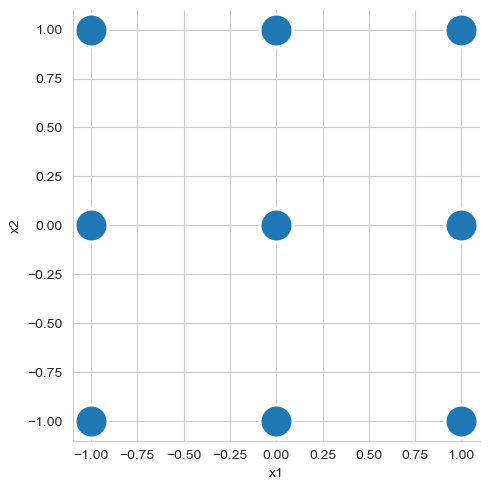

In [7]:
sns.set_style('whitegrid')

sns.relplot(data = trial_inputs, x='x1', y='x2', s=550)

plt.show()

The `.value_counts()` method previously showed that `x1` and `x2` have 3 unique values each. Even though there are dozens of observations at each unique value, there are just 9 combinations of the 2 variables. The scatter plot does not show the count for each combination though. We can use `.groupby().size()` to get the number of observations per combination.

In [8]:
trial_inputs.groupby(['x1', 'x2']).size().reset_index(name='num_rows')

,x1,x2,num_rows
0,-1,-1,16
1,-1,0,32
2,-1,1,16
3,0,-1,32
4,0,0,48
5,0,1,32
6,1,-1,16
7,1,0,32
8,1,1,16


We can use this grouped dataframe to color the markers by the sample size. This makes it easier to see that the *center point* with `x1=0` and `x2=0` has the most samples associated with it.

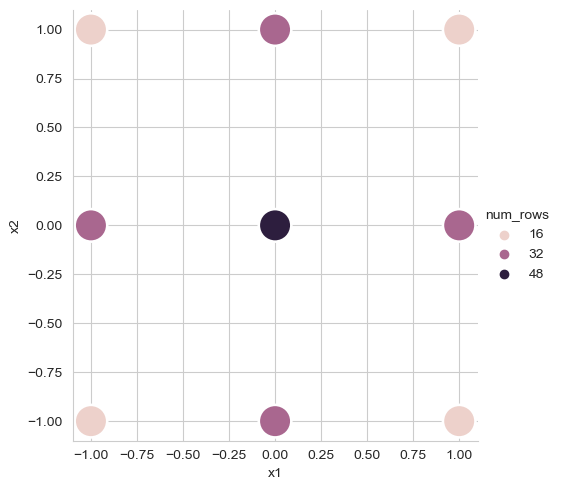

In [9]:
sns.relplot(data = trial_inputs.groupby(['x1', 'x2']).size().reset_index(name='num_rows'), 
            x='x1', y='x2', hue='num_rows', s=550)

plt.show()

Alternatively, we can use a cross tabulation and a heat map to visualize the counts.

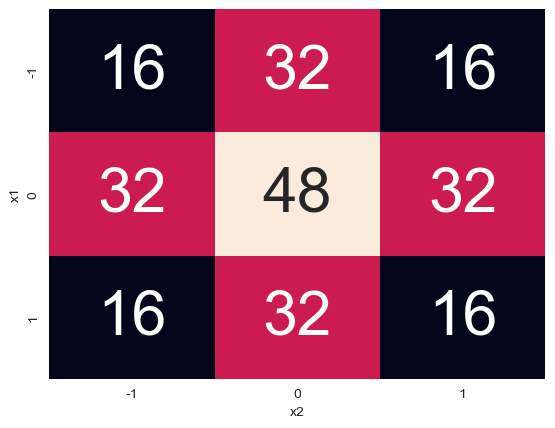

In [10]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(trial_inputs.x1, trial_inputs.x2), 
            annot=True, annot_kws={'size': 45},
            cbar=False)

plt.show()

The above plots show us the relationship and combination between just two of the continuous inputs. We have more to consider. Let's use a pairs plot which shows all pair wise scatter plots. This shows which pair have a 3x3 grid vs 2x2 grid and 2x3 grid.

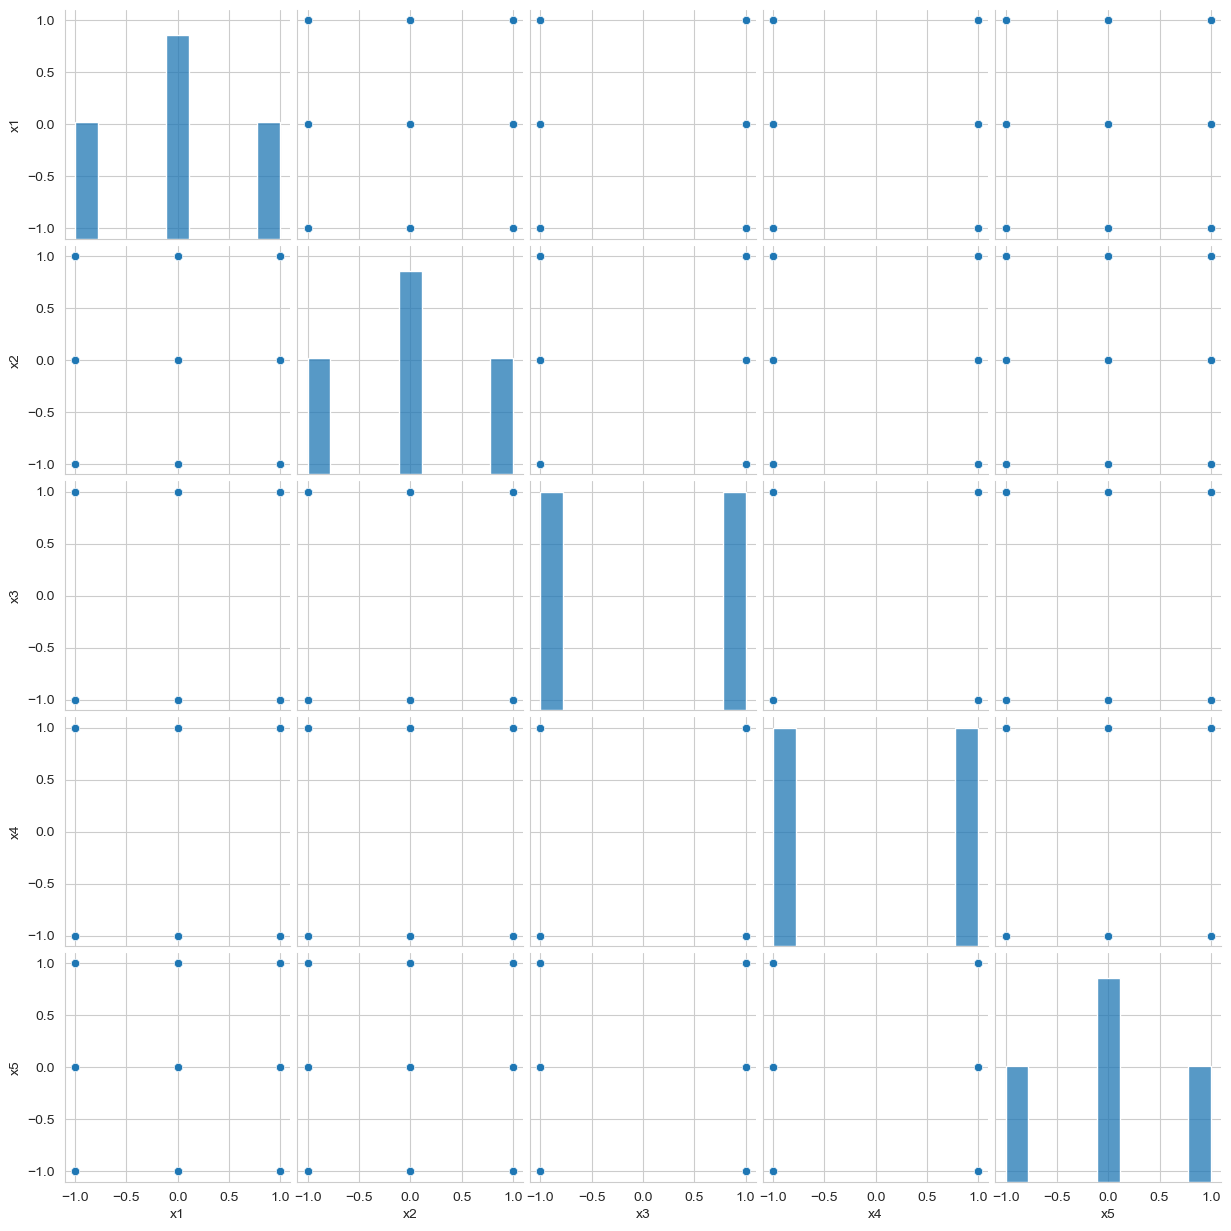

In [11]:
sns.pairplot(data = trial_inputs, vars=['x1', 'x2', 'x3', 'x4', 'x5'])

plt.show()

The above pairs plot is useful, but we can also attempt to visualize the combinations across all 5 continuous inputs in one figure. We will plot the relationship between `x1` and `x2` as a scatter plot with horizontal facets associated with `x5`, the vertical facets associated with `x3`, and the marker color associated with `x4`. 

As shown by the figure below, we are starting to find the pattern of the experimental design! When we just visualized `x1` and `x2` together, it looked like there was a 3x3 grid of points. However, conditioning on the values of `x5` (the horizontal or column facets) we see that `x1` and `x2` are arranged differently! 

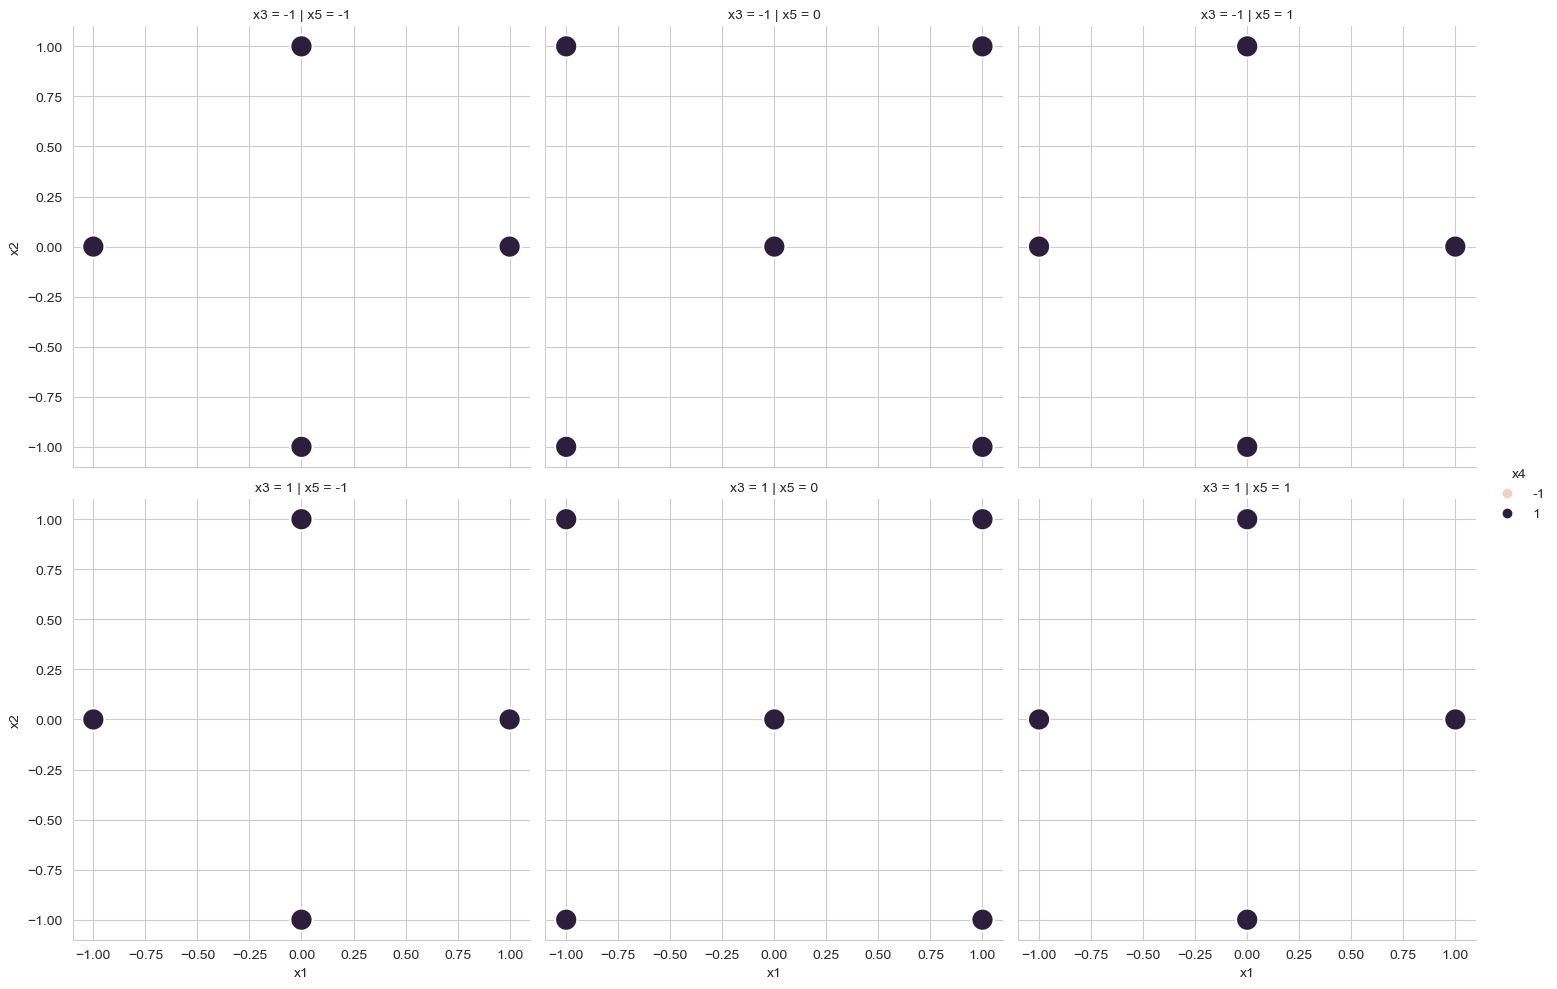

In [12]:
sns.relplot(data = trial_inputs, x='x1', y='x2', hue='x4', col='x5', row='x3', s=250)

plt.show()

We cannot distinguish between the values of `x4` in the above plot. So let's instead use the marker shape and color to denote `x4` instead of marker color. In the figure below, the x represents `x4=1` while the circle denotes `x4=-1`. We see that both values of `x4` are present at all marker locations.

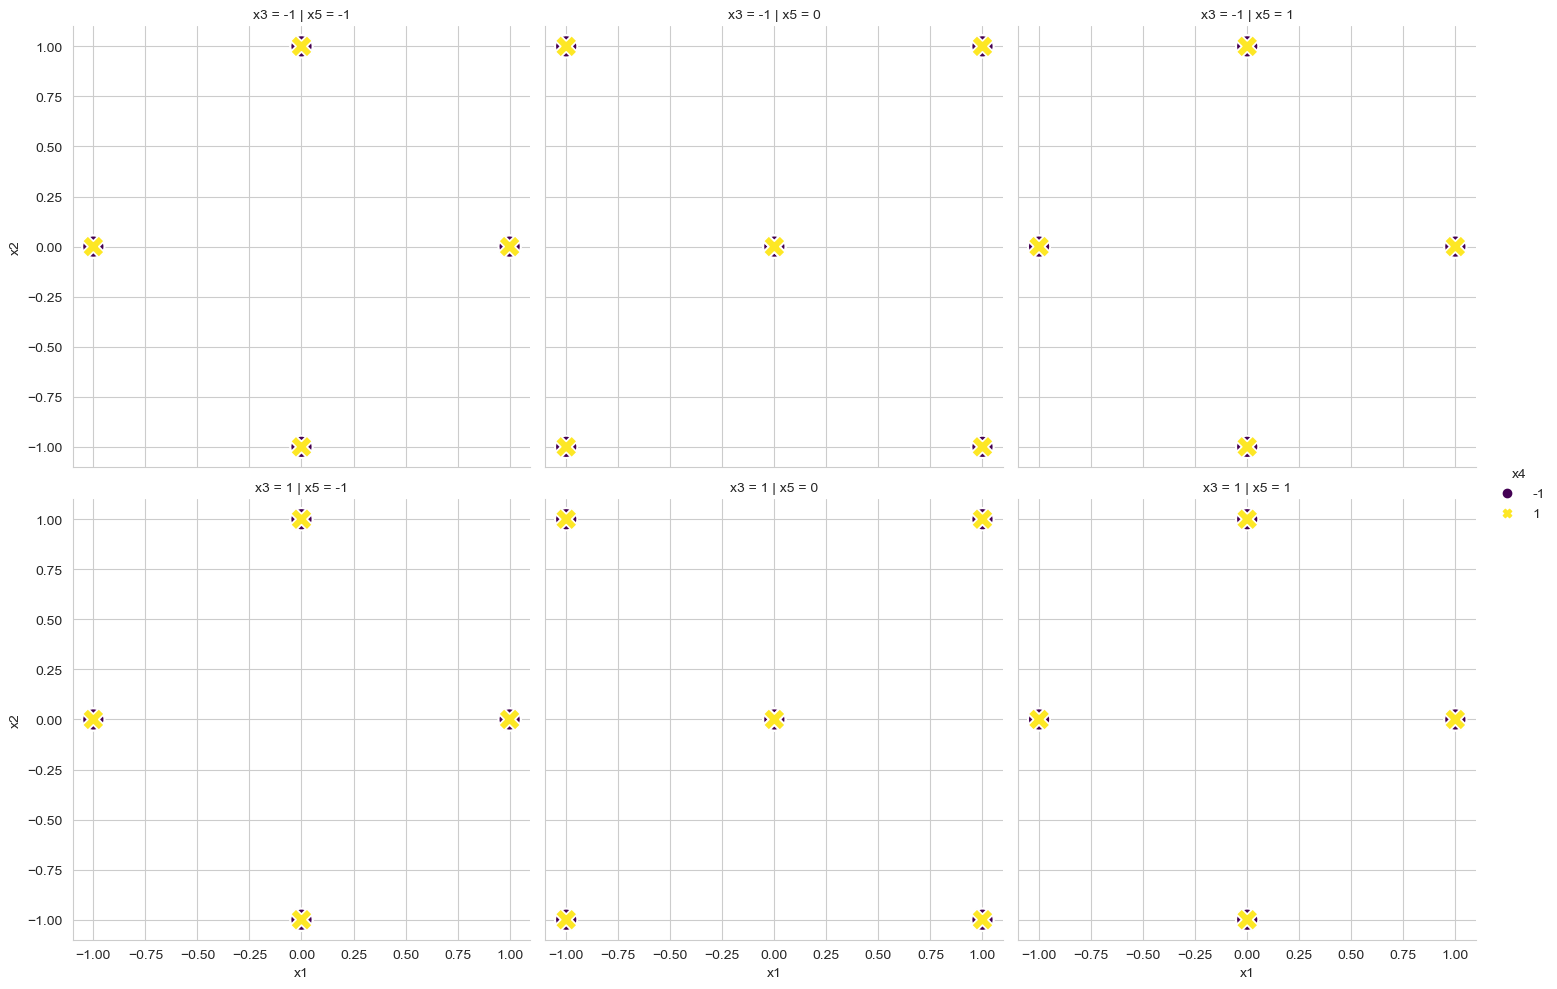

In [17]:
sns.relplot(data = trial_inputs, x='x1', y='x2', style='x4', hue='x4', col='x5', row='x3', s=250,
            palette='viridis')

plt.show()

Let's groupby the continuous inputs and count the number of rows associated with the combinations.

In [18]:
x_combos = trial_inputs.groupby(['x1', 'x2', 'x3', 'x4', 'x5']).size().reset_index(name='num_rows')

As we see below there are just 2 unique values for the number of rows for each combination.

In [19]:
x_combos.num_rows.value_counts()

4     48
12     4
Name: num_rows, dtype: int64

The `num_rows` variable will be converted to a categorical just to support visualization.

In [20]:
x_combos['num_rows'] = x_combos.num_rows.astype('category')

Let's look at the scatter plot again of all 5 continuous inputs but color by the number of rows per combination. As shown below the `x1` and `x2` *center point* of `x1=0` and `x2=0` is replicated 12 times, while all other combinations occur 4 times.

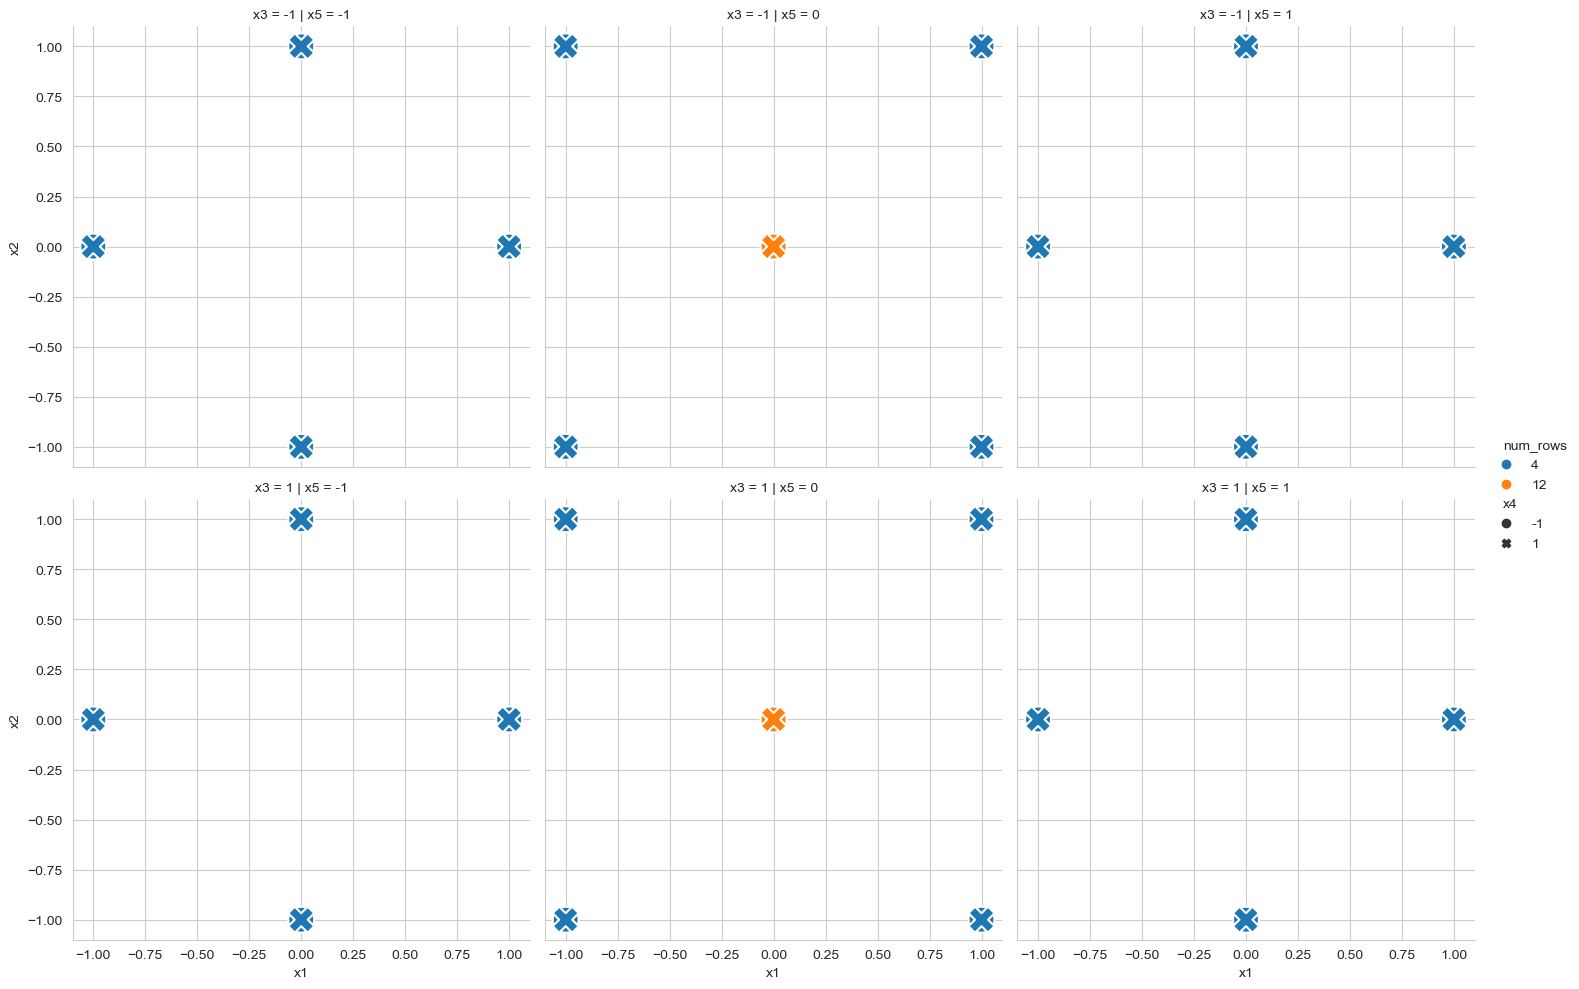

In [21]:
sns.relplot(data = x_combos, x='x1', y='x2', style='x4', col='x5', row='x3', hue='num_rows', s=350)

plt.show()

There is one last input we need to consider, the categorical input `x6`. As shown by the bar chart below, the unique values of `x6` have equal counts!

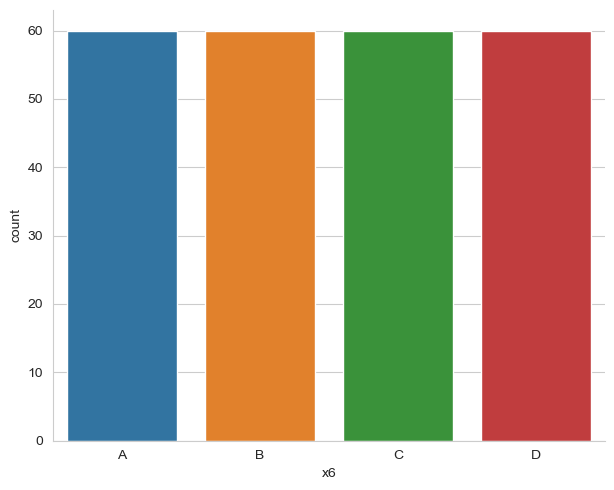

In [22]:
sns.catplot(data = trial_inputs, x='x6', kind='count', aspect=1.25)

plt.show()

Let's now visualize the relationships of the 5 continuous inputs again. This time the vertical facets correspond to the `x6` variable and the color shows the value of `x3`. As we see below, the patterns appear to repeat across the categorical variable values!

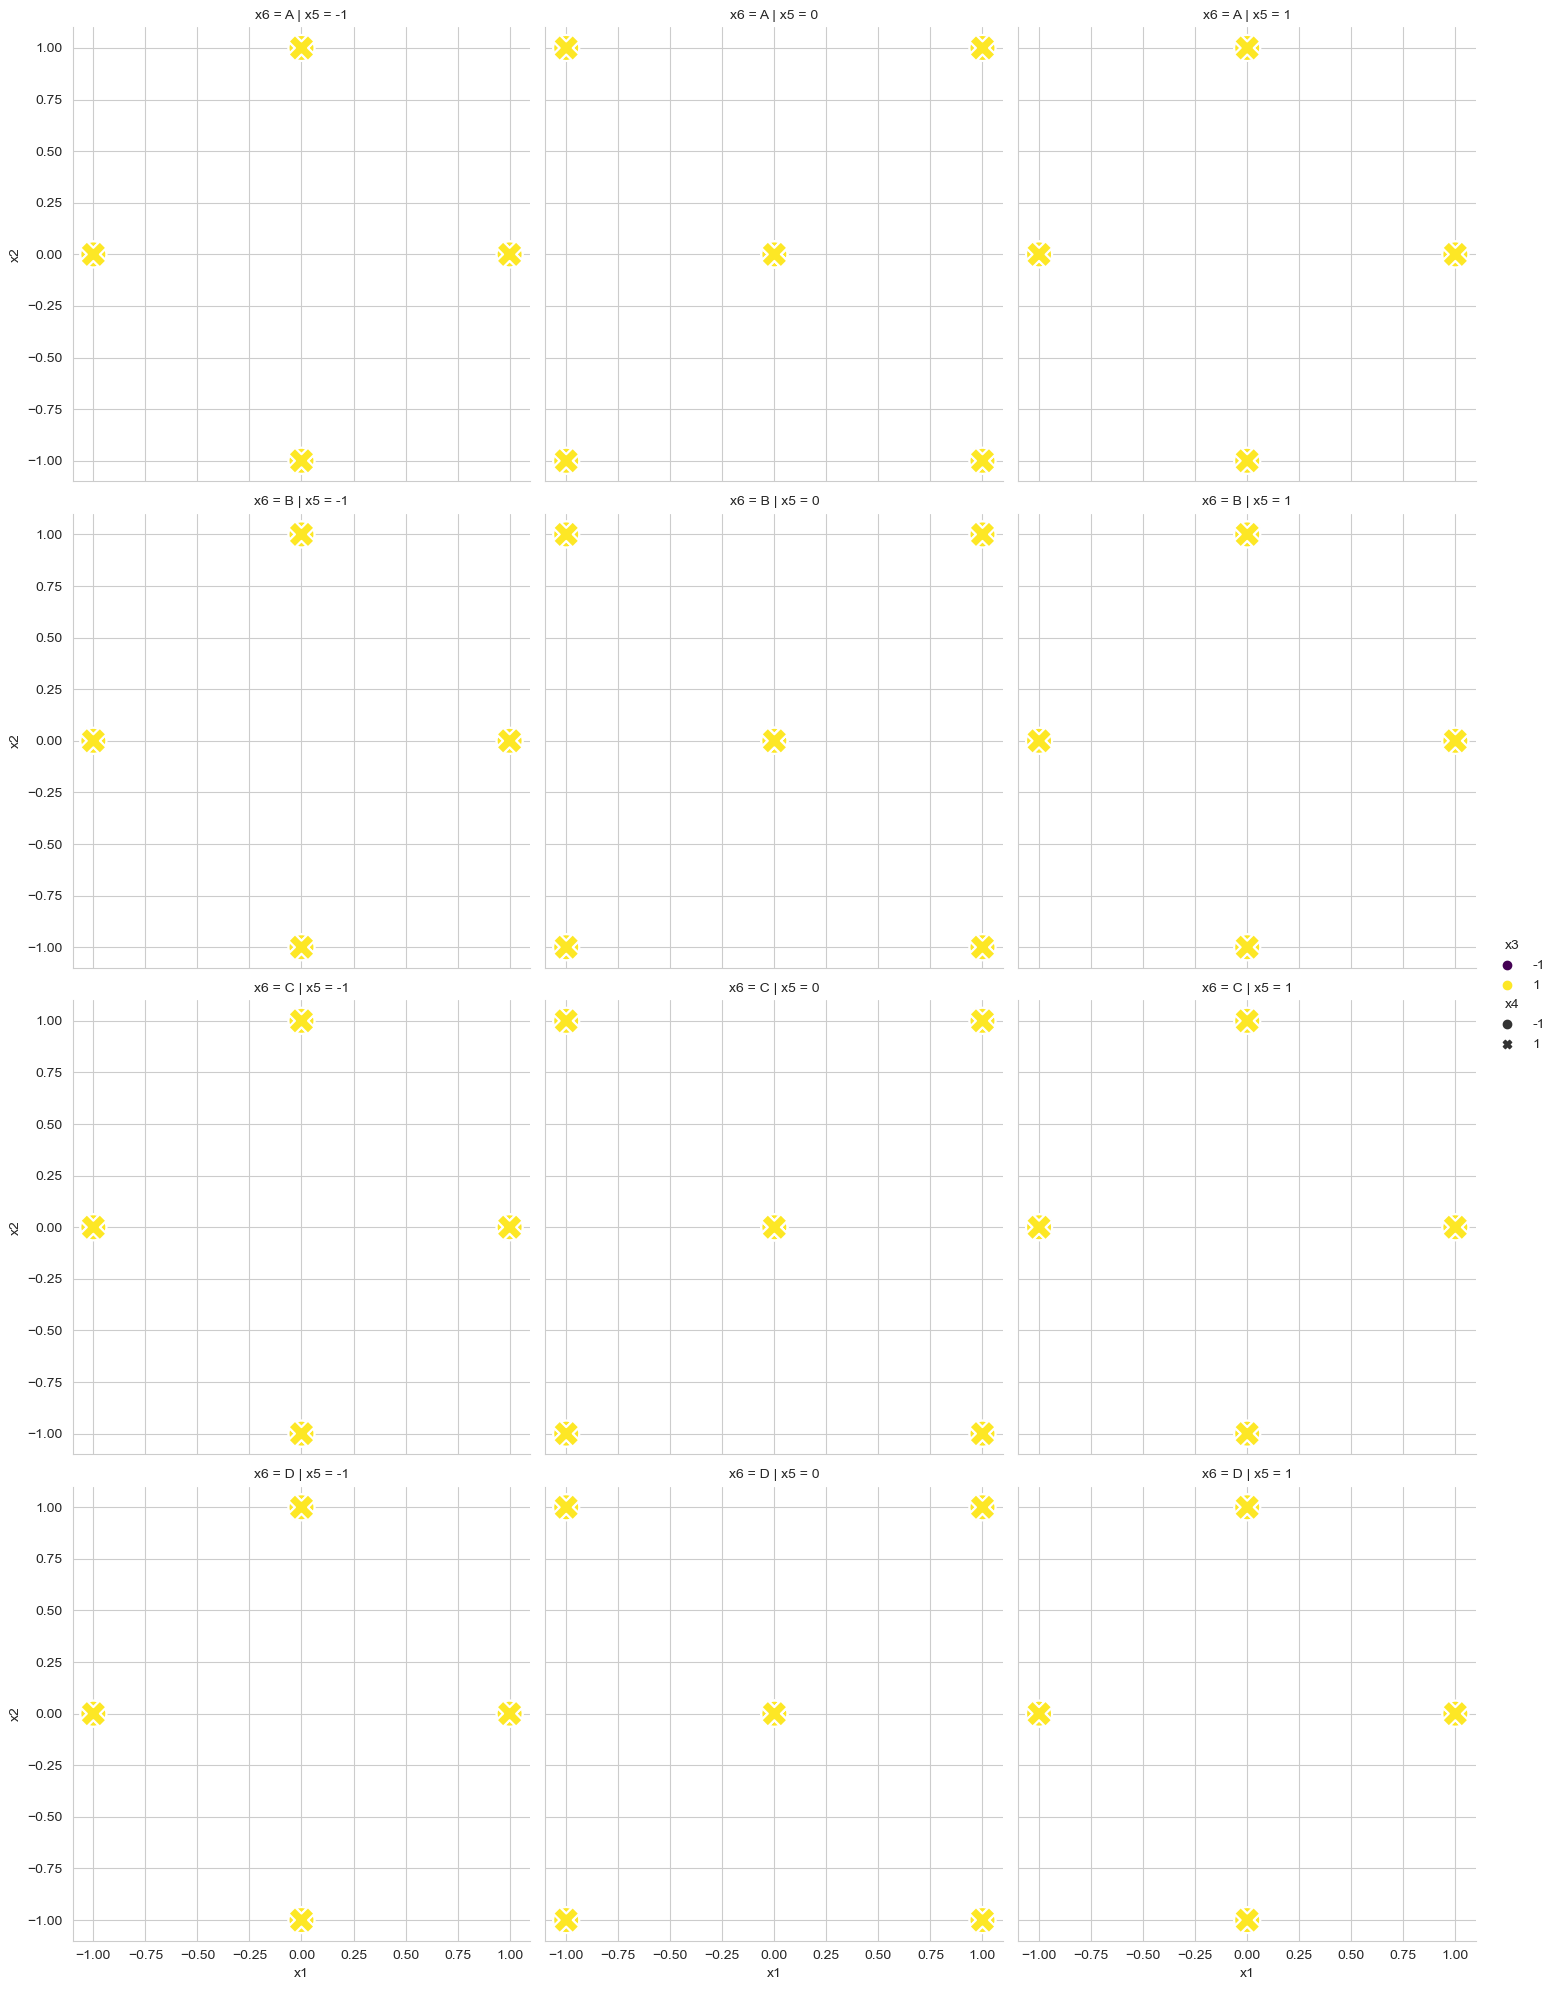

In [30]:
sns.relplot(data = trial_inputs, x='x1', y='x2', style='x4', hue='x3', col='x5', row='x6', s=350,
            palette='viridis')

plt.show()

Finally, let's count the number of rows for the combinations of all inputs.

In [25]:
x_combos_b = trial_inputs.groupby(['x1', 'x2', 'x3', 'x4', 'x5', 'x6']).size().reset_index(name='num_rows')

The number of rows per combination:

In [26]:
x_combos_b

,x1,x2,x3,x4,x5,x6,num_rows
0,-1,-1,-1,-1,0,A,1
1,-1,-1,-1,-1,0,B,1
2,-1,-1,-1,-1,0,C,1
3,-1,-1,-1,-1,0,D,1
4,-1,-1,-1,1,0,A,1
...,...,...,...,...,...,...,...
203,1,1,1,-1,0,D,1
204,1,1,1,1,0,A,1
205,1,1,1,1,0,B,1
206,1,1,1,1,0,C,1


It looks like there is 1 row (observation) for most of the input combinations! But, let's confirm that is in fact true by applying the `.value_counts()` method to `num_rows`.

In [27]:
x_combos_b.num_rows.value_counts()

1    192
3     16
Name: num_rows, dtype: int64

As shown above, 192 of the input combinations have 1 row. There are 16 combinations however that have 3 rows. Those 16 combinations are displayed below. If you look through the rows displayed below you will see that `x1`, `x2`, and `x5` equal zero for every combination! Thus, the combinations with 3 observations have the *center point* for those three inputs.

In [28]:
x_combos_b.loc[ x_combos_b.num_rows == 3, :]

,x1,x2,x3,x4,x5,x6,num_rows
96,0,0,-1,-1,0,A,3
97,0,0,-1,-1,0,B,3
98,0,0,-1,-1,0,C,3
99,0,0,-1,-1,0,D,3
100,0,0,-1,1,0,A,3
101,0,0,-1,1,0,B,3
102,0,0,-1,1,0,C,3
103,0,0,-1,1,0,D,3
104,0,0,1,-1,0,A,3
105,0,0,1,-1,0,B,3


These visualizations help us understand the **experimental design** applied to the inputs. The design is created *before* the data are collected. Since we are working with the data *after* the experiments completed, it is critical to visualize the input patterns to help us better understand the design.

### Outputs

#### Number of cycles

A trial consists of creating a battery using specific materials and manufacturing methods, as specified by the 6 inputs. The battery is subjected to an experimental test which applies a load and the experimentalists record the behavior of the battery under that applied load. This process is repeated many, many times. Each repeated time is known as a **cycle**. The goal is to find the input configuration which will lead to **maximizing** the number of cycles the battery can survive before failing. 

The output data `.info()` method is printed below. The output `y` is given per `cycle` for each experimental trial. The `trial_id` is the *key* to link the output to the trial inputs provided in `trial_inputs`.

In [31]:
trial_outputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17431 entries, 0 to 17430
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   trial_id  17431 non-null  int64  
 1   cycle     17431 non-null  int64  
 2   y         17431 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 408.7 KB


The head and tail of the output data set is shown below.

In [32]:
trial_outputs

,trial_id,cycle,y
0,1,1,0.000282
1,1,2,0.000284
2,1,3,0.000285
3,1,4,0.000290
4,1,5,0.000282
...,...,...,...
17426,240,77,0.000247
17427,240,78,0.000251
17428,240,79,0.000255
17429,240,80,0.000259


As described in the problem statement for this project, the primary goal is to understand if trial will last 100 cycles. Thus, we do not necessarily need to consider the value of the output `y`. We can determine the number of cycles associated with each experimental trial by using grouping and aggregating methods! 

The cell below groups by `trial_id` and then uses `aggregate()` to calculate the number of rows (via `size()`) of `cycle` for each `trial_id` value. It also calculates the maximum observed `cycle` value for each `trial_id` value by applying `max()` to `cycle`. As the print out shows, either approach will give you the same result for this application! 

In [33]:
trial_outputs.groupby(['trial_id']).\
aggregate(num_rows = ('cycle', 'size'),
          num_cycles = ('cycle', 'max')).\
reset_index()

,trial_id,num_rows,num_cycles
0,1,39,39
1,2,52,52
2,3,38,38
3,4,50,50
4,5,40,40
...,...,...,...
235,236,100,100
236,237,83,83
237,238,100,100
238,239,100,100


Also, the number rows associated with the above grouped data set is the **same** as the number of rows in `trial_inputs`. We can therefore associate the number of cycles per trial with the inputs associated with the trial! The merged data set is shown below.

In [34]:
output_summary = trial_outputs.groupby(['trial_id']).aggregate(num_cycles=('cycle', 'max')).reset_index()

In [35]:
trial_summary = trial_inputs.merge( output_summary, on=['trial_id'], how='left' )

In [36]:
trial_summary

,trial_id,x1,x2,x3,x4,x5,x6,num_cycles
0,1,-1,-1,-1,-1,0,A,39
1,2,1,-1,-1,-1,0,A,52
2,3,-1,1,-1,-1,0,A,38
3,4,1,1,-1,-1,0,A,50
4,5,-1,0,-1,-1,-1,A,40
...,...,...,...,...,...,...,...,...
235,236,0,-1,1,1,1,D,100
236,237,0,1,1,1,1,D,83
237,238,0,0,1,1,0,D,100
238,239,0,0,1,1,0,D,100


We can now visualize the distribution of the number of cycles across the trials. As we see below, the distribution is quite strange looking! There is a large spike near 100!. Thus, it appears that many trials come quite to 100 cycles!

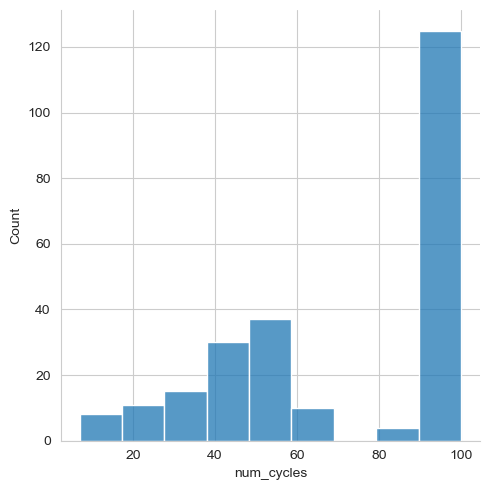

In [37]:
sns.displot(data = trial_summary, x='num_cycles')

plt.show()

Since we see a big spike near 100, let's check if that spike corresponds to values identically equaling 100. As we see below almost 50% of the trials reach 100 cycles!

In [38]:
np.mean( trial_summary.num_cycles == 100 )

0.49166666666666664

Because this is such a strange distribution, I highly recommend that you treat this problem as a **classification** problem. The EVENT should correspond to the trial reaching 100 cycles. You can easily create the binary outcome with the `np.where()` function. The binary outcome is created for you below.

In [39]:
trial_summary['binary_outcome'] = np.where( trial_summary.num_cycles == 100, 1, 0)

In [40]:
trial_summary.binary_outcome.value_counts()

0    122
1    118
Name: binary_outcome, dtype: int64

You now have everything necessary to perform the binary classification problem!

#### Continuous output

That said, by summarizing the data as we have done, we have ignored the continuous output value! We have thrown away information. It is still critical to explore the behavior of the continuous output. Doing so can help identify useful **clusters** within the data. Getting the data ready to support this clustering will take some effort, but it could yield some interesting insights into the data.

Before we can organize the data to support clustering, we need to visualize the output with respect to the cycles. This is straight forward to do with the long-format data, but we must be careful with the Seaborn arguments. If we simply provide the `cycle` as the `x` variable and the `y` as the `y` variable to `sns.relplot()` with `kind='line'`, Seaborn will *average* over the trials!

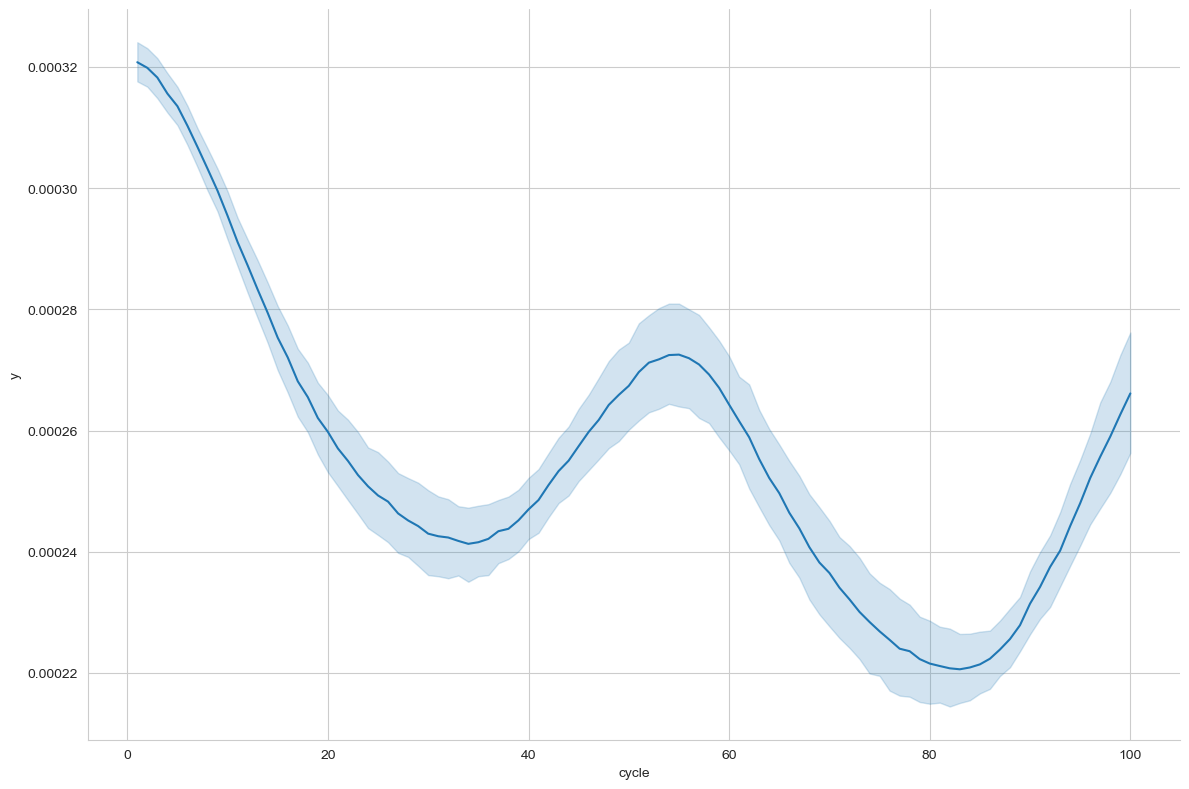

In [41]:
sns.relplot(data = trial_outputs, x='cycle', y='y', kind='line', height=8, aspect=1.5)

plt.show()

We need to specify `estimator=None` and `units='trial_id'` in order to visualize each individual trial's results! Below we see the behavior across all trials!

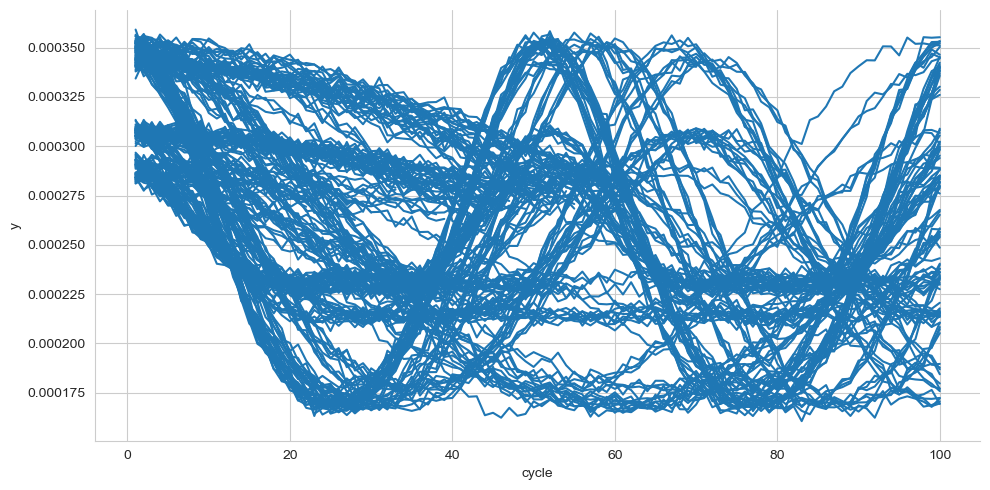

In [65]:
sns.relplot(data = trial_outputs, x='cycle', y='y', kind='line',
            estimator=None, units='trial_id', aspect=2)

plt.show()

If we want to visualize the influence of the inputs, we can merge the `trial_inputs` data with the `trial_outputs` and use facets and color to show the behavior of interest. For example, the plot below colors by the categorical `x6` with row facets based on `x4` and column facets based on `x3`. I will leave it to you to explore the influence of the other inputs.

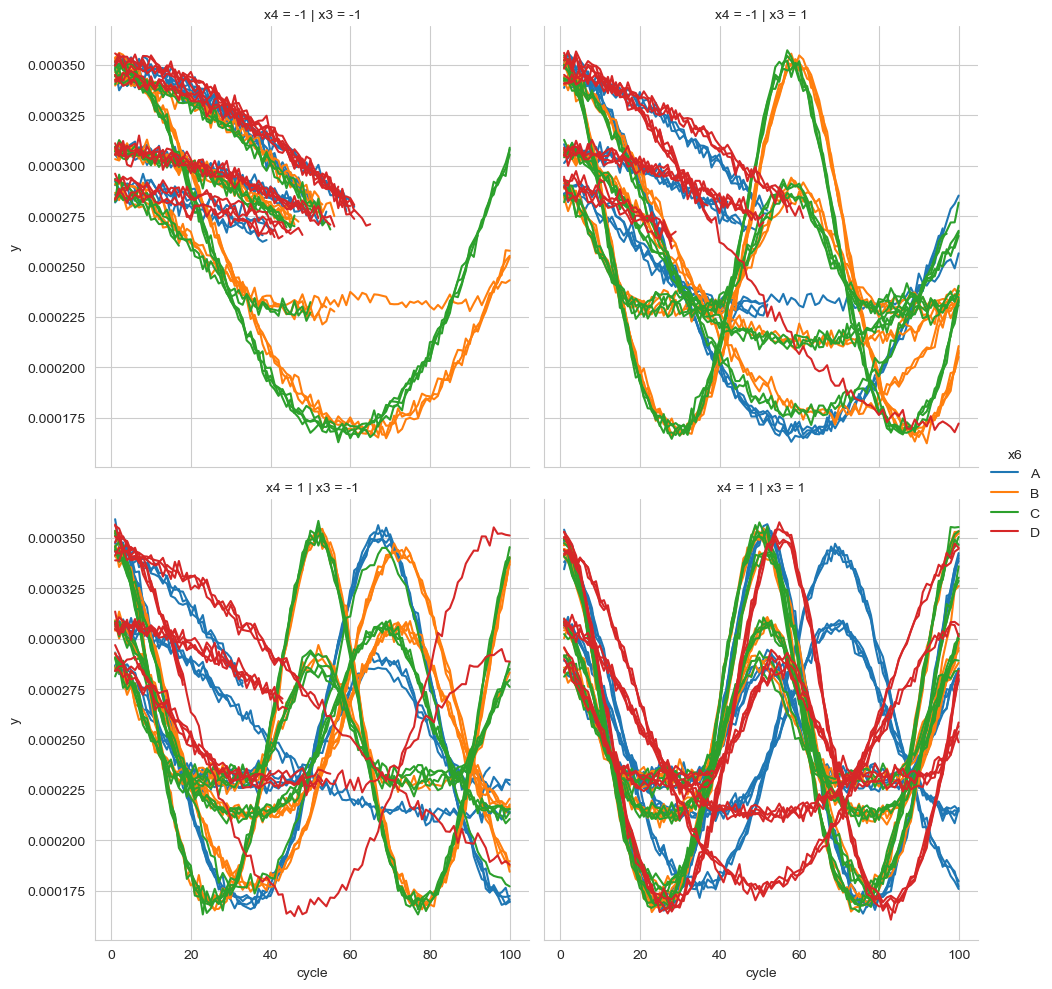

In [58]:
sns.relplot(data = trial_outputs.merge(trial_inputs, on=['trial_id'], how='left'), 
            x='cycle', y='y', kind='line',
            hue='x6', col='x3', row='x4',
            estimator=None, units='trial_id')

plt.show()

How does this support clustering? First, it is important to visualize the data before modeling. We have revealed the underlying **structure** of the data. We have seen that some trials have cyclical behavior, while other trials appear to be "cut" short and do NOT reveal the cyclcial "up-down" motion of the continuous output `y`. Therefore, it would be useful to try and extract FEATURES that represent the behavior of the continuous output during the trial. 

The **extracted** FEATURES can be simple or complex. The simplest possible set of features would be those that SUMMARIZE `y` across the entire trial. For example, the MEAN, MEDIAN, MIN, MAX, and STANDARD DEVIATION of `y` can be calculated for each trial.

In [44]:
trial_outputs.groupby(['trial_id']).\
aggregate(num_rows = ('cycle', 'size'),
          num_cycles = ('cycle', 'max'),
          y_avg = ('y', 'mean'),
          y_med = ('y', 'median'),
          y_min = ('y', 'min'),
          y_max = ('y', 'max'),
          y_sd = ('y', 'std')).\
reset_index()

,trial_id,num_rows,num_cycles,y_avg,y_med,y_min,y_max,y_sd
0,1,39,39,0.000277,0.000278,0.000262,0.000290,0.000007
1,2,52,52,0.000324,0.000328,0.000279,0.000353,0.000023
2,3,38,38,0.000278,0.000279,0.000266,0.000288,0.000007
3,4,50,50,0.000325,0.000331,0.000287,0.000352,0.000021
4,5,40,40,0.000283,0.000285,0.000268,0.000296,0.000007
...,...,...,...,...,...,...,...,...
235,236,100,100,0.000249,0.000236,0.000209,0.000308,0.000034
236,237,83,83,0.000241,0.000227,0.000209,0.000310,0.000030
237,238,100,100,0.000249,0.000238,0.000170,0.000345,0.000059
238,239,100,100,0.000249,0.000240,0.000174,0.000347,0.000059


The `y` summary statistics can be then explored.

In [45]:
trial_y_summary = trial_outputs.groupby(['trial_id']).\
aggregate(num_rows = ('cycle', 'size'),
          num_cycles = ('cycle', 'max'),
          y_avg = ('y', 'mean'),
          y_med = ('y', 'median'),
          y_min = ('y', 'min'),
          y_max = ('y', 'max'),
          y_sd = ('y', 'std')).\
reset_index()

A pairs plot is used below to visually explore the the summary statistics of `y` across all trials. The pairs plot reveals several potential clusters! The pairs plot also reveals there are several summary statistics that appear to be highly correlated!

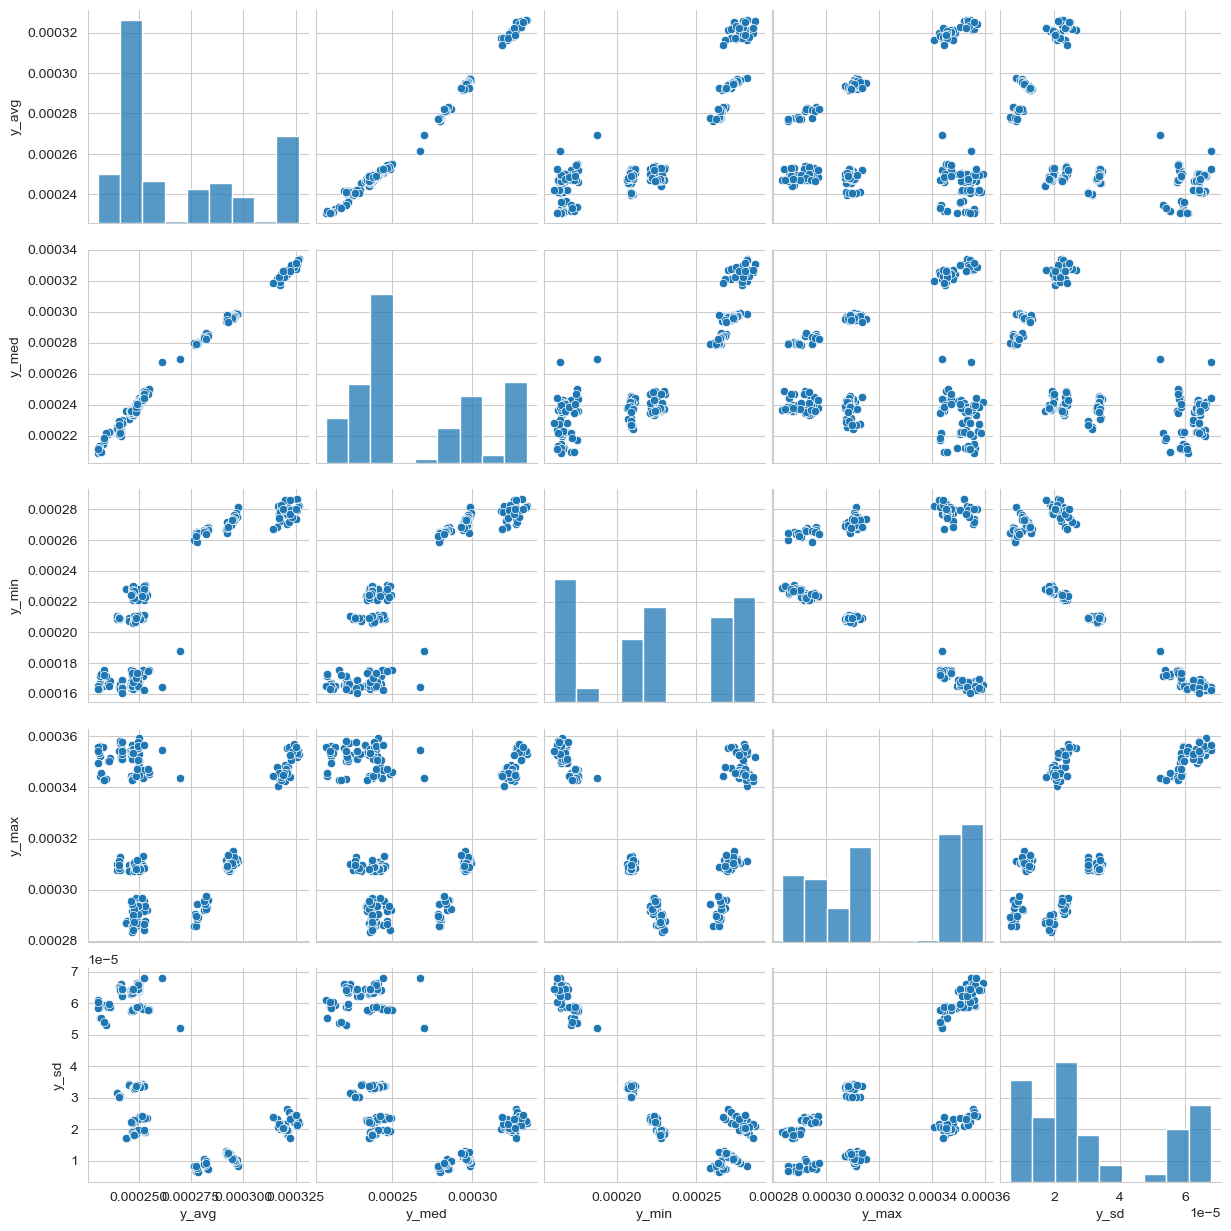

In [46]:
sns.pairplot(data = trial_y_summary, 
             vars=['y_avg', 'y_med', 'y_min', 'y_max', 'y_sd'])

plt.show()

There is nothing wrong with using the above summary statistics. However, they were calculated across the ENTIRE trial. This means the cyclical nature was completely ignored! Fully capturing the cyclical nature is beyond the scope of this class. However, there are a few things we can do to start to capture the behavior. 

One approach is to DIVIDE the trial into segments. For example, we could CUT the trial into the two halves. The summary statistics can be calculated in EACH half for each trial. This allows us to capture if the average in the first half is GREATER than the average in the second half. Cutting the trial into more INTERVALS adds further RESOLUTION. For example, cutting the trial into 5 SEGMENTS allows capturing the average `y` within each segment. This allows summarizing the change in greater detail than just within two halves!

The `cycle` column in `trial_outputs` is the cycle within a given trial. It starts at 1 and increases up to the maximum number cycles associated with a trial.

In [47]:
trial_outputs

,trial_id,cycle,y
0,1,1,0.000282
1,1,2,0.000284
2,1,3,0.000285
3,1,4,0.000290
4,1,5,0.000282
...,...,...,...
17426,240,77,0.000247
17427,240,78,0.000251
17428,240,79,0.000255
17429,240,80,0.000259


We previously saw how to calculate the maximum number of cycles per trial. The max number of cycles is contained within the `output_summary` DataFrame.

In [49]:
output_summary

,trial_id,num_cycles
0,1,39
1,2,52
2,3,38
3,4,50
4,5,40
...,...,...
235,236,100
236,237,83
237,238,100
238,239,100


Let's join the `output_summary` DataFrame to `trial_outputs` ON the `trial_id` column. This JOINED DataFrame is assigned to the `trial_outputs_b` DataFrame.

In [51]:
trial_outputs_b = trial_outputs.merge( output_summary, on='trial_id', how='left')

The new JOINED DataFrame now includes the MAXIMUM number of cycles PER trial!

In [52]:
trial_outputs_b

,trial_id,cycle,y,num_cycles
0,1,1,0.000282,39
1,1,2,0.000284,39
2,1,3,0.000285,39
3,1,4,0.000290,39
4,1,5,0.000282,39
...,...,...,...,...
17426,240,77,0.000247,81
17427,240,78,0.000251,81
17428,240,79,0.000255,81
17429,240,80,0.000259,81


Dividing `cycle` by the maximum number of cycles, `num_cycles`, provides the normalized number of cycles. This normalized value is between 0 and 1.

In [53]:
trial_outputs_b['norm_cycle'] = trial_outputs_b.cycle / trial_outputs_b.num_cycles

In [54]:
trial_outputs_b.describe()

,trial_id,cycle,y,num_cycles,norm_cycle
count,17431.000000,17431.000000,17431.000000,17431.000000,17431.000000
mean,120.738454,43.145086,0.000259,85.290173,0.506884
std,67.263248,28.278423,0.000050,24.094603,0.288679
min,1.000000,1.000000,0.000161,7.000000,0.010000
25%,62.000000,19.000000,0.000224,61.000000,0.260000
50%,117.000000,39.000000,0.000260,100.000000,0.510000
75%,174.000000,66.000000,0.000298,100.000000,0.760000
max,240.000000,100.000000,0.000359,100.000000,1.000000


As shown below, even though the maximum `cycle` value changes across trials, the maximum `norm_cycle` value is 1 for ALL trials!

In [55]:
trial_outputs_b.groupby(['trial_id']).\
aggregate(max_cycles = ('cycle', 'max'),
          max_norm_cycles = ('norm_cycle', 'max')).\
reset_index()

,trial_id,max_cycles,max_norm_cycles
0,1,39,1.0
1,2,52,1.0
2,3,38,1.0
3,4,50,1.0
4,5,40,1.0
...,...,...,...
235,236,100,1.0
236,237,83,1.0
237,238,100,1.0
238,239,100,1.0


Visualizing `y` with respect to `norm_cycle` now shows all trials reach the same "end point"! Certain trials do not appear to "end early" because the `norm_cycle` value of 1.0 corresponds to the END of the trial!

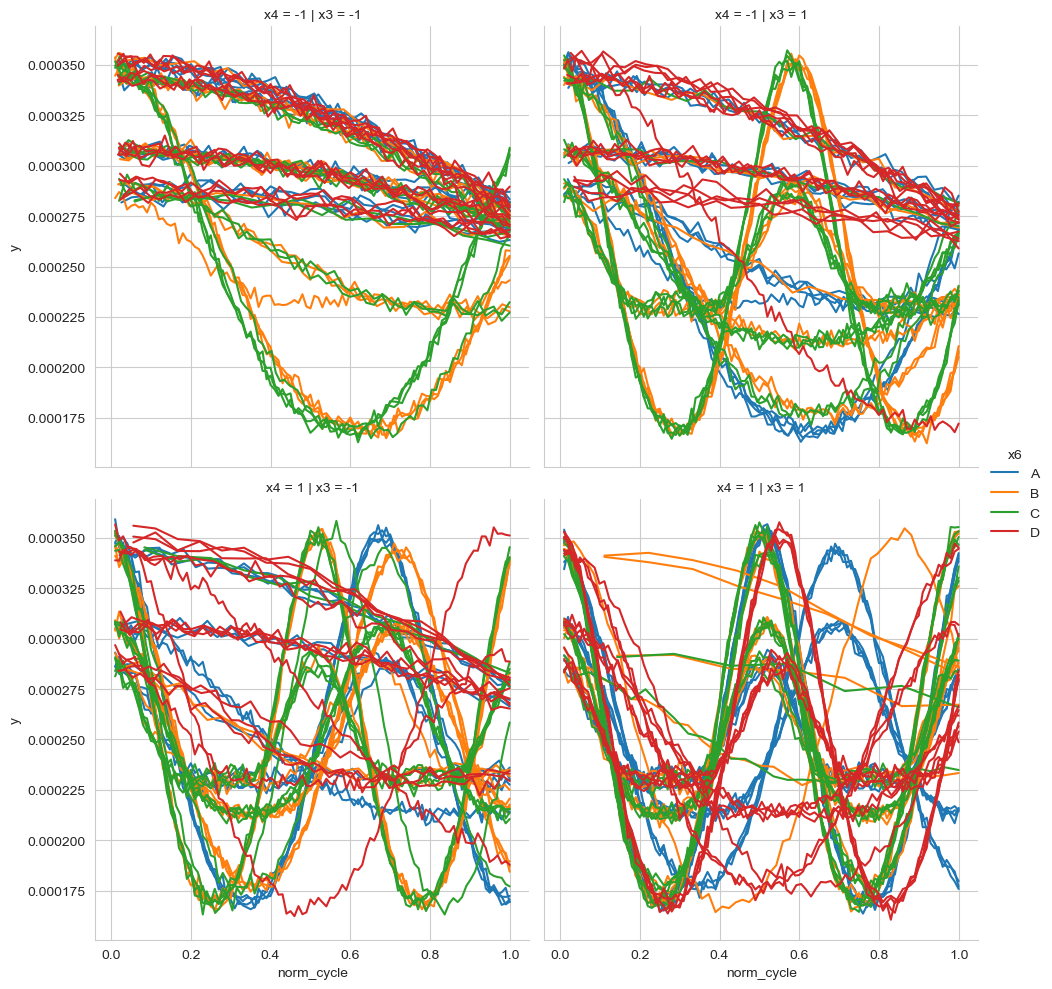

In [59]:
sns.relplot(data = trial_outputs_b.merge(trial_inputs, on=['trial_id'], how='left'), 
            x='norm_cycle', y='y', kind='line',
            hue='x6', col='x3', row='x4',
            estimator=None, units='trial_id')

plt.show()

**Why is this useful?** 

The `norm_cycles` column makes it VERY easy to divide the trial into segments. The first half of the trial corresponds to `norm_cycle < 0.5`. Likewise, the first QUARTER of the trial corresponds to `norm_cycle < 0.25`. Contrast this to identify the first HALF based on the "raw" `cycle` value. If the trial reaches 100 cycles then the first HALF corresponds to the first 50 cycles. However, if the trial only reaches 30 cycles then the first HALF corresponds to the first 15 cycles. The "normalized" or "proportion of max" makes it very easy to identify the halves, quarters, or other intervals.

Let's use this approach to divide each trial into 5 segments. The `pd.cut()` function is used to create the intervals by cutting the `norm_cycle` column. The `bins` argument to `pd.cut()` allows defining the **break points** between each bin. The cell below sets `bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0]` to divide each trial into 5 segments. The first bin is the first 20% of the trial, the second bin is the next 20% of the trial, so on and so on.

In [62]:
trial_outputs_b['bin_cycle'] = pd.cut( trial_outputs_b.norm_cycle, bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                       include_lowest=True, ordered=True )

In [63]:
trial_outputs_b

,trial_id,cycle,y,num_cycles,norm_cycle,bin_cycle
0,1,1,0.000282,39,0.025641,"(-0.001, 0.2]"
1,1,2,0.000284,39,0.051282,"(-0.001, 0.2]"
2,1,3,0.000285,39,0.076923,"(-0.001, 0.2]"
3,1,4,0.000290,39,0.102564,"(-0.001, 0.2]"
4,1,5,0.000282,39,0.128205,"(-0.001, 0.2]"
...,...,...,...,...,...,...
17426,240,77,0.000247,81,0.950617,"(0.8, 1.0]"
17427,240,78,0.000251,81,0.962963,"(0.8, 1.0]"
17428,240,79,0.000255,81,0.975309,"(0.8, 1.0]"
17429,240,80,0.000259,81,0.987654,"(0.8, 1.0]"


Let's confirm the cutting worked. The continuous output `y` is plotted vs the `cycle` for the first trial, `trial_id == 1` below. This trial only reaches a max cycle length of 39.

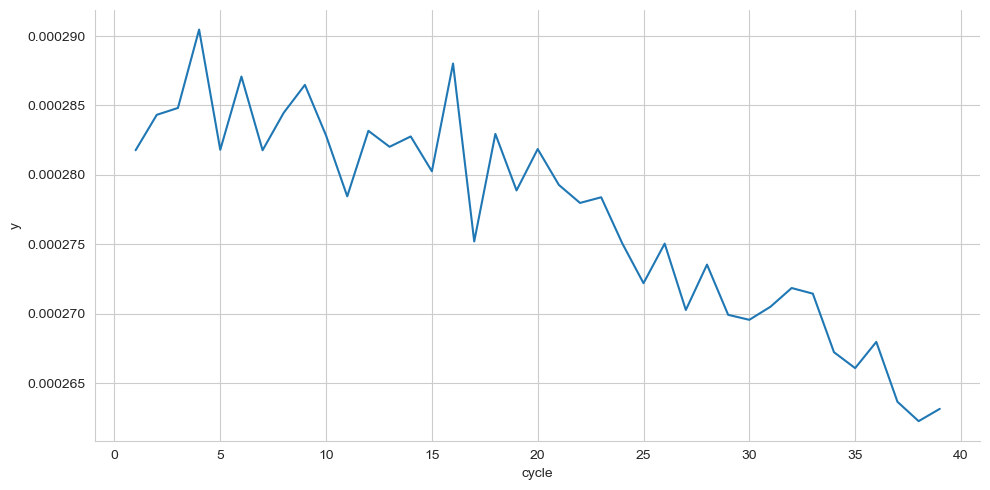

In [68]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id == 1, : ], 
            x='cycle', y='y', kind='line', 
            estimator=None, units='trial_id', aspect=2)

plt.show()

Coloring by the `bin_cycle` variable highlights each 20% segment within the trial!

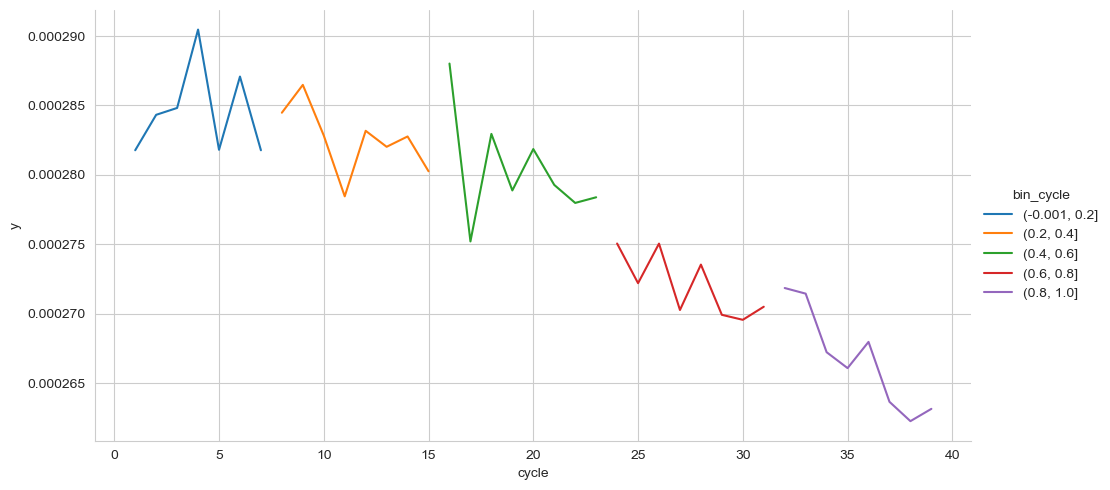

In [69]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id == 1, : ], 
            x='cycle', y='y', kind='line', hue='bin_cycle',
            estimator=None, units='trial_id', aspect=2)

plt.show()

Let's now examine the last trial, `trial_id == 240`. This trial reached 81 cycles.

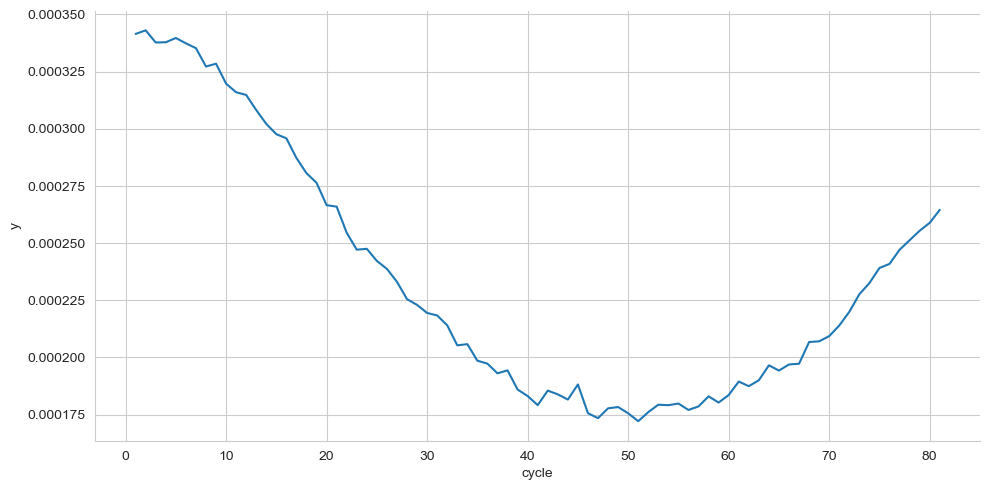

In [70]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id == 240, : ], 
            x='cycle', y='y', kind='line', 
            estimator=None, units='trial_id', aspect=2)

plt.show()

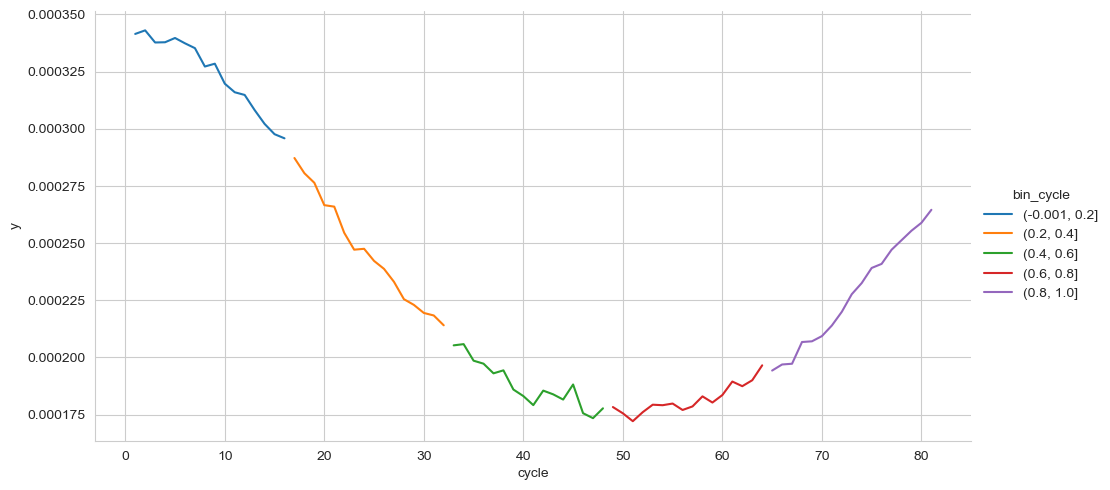

In [71]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id == 240, : ], 
            x='cycle', y='y', kind='line', hue='bin_cycle',
            estimator=None, units='trial_id', aspect=2)

plt.show()

The 5 length of the segements depends on the total number of cycles in the trial. Thus, `trial_id == 240` has longer segments compared to `trial_id == 1`. The line chart below shows BOTH trials on the same axes. The first trial is the shorter of the two curves.

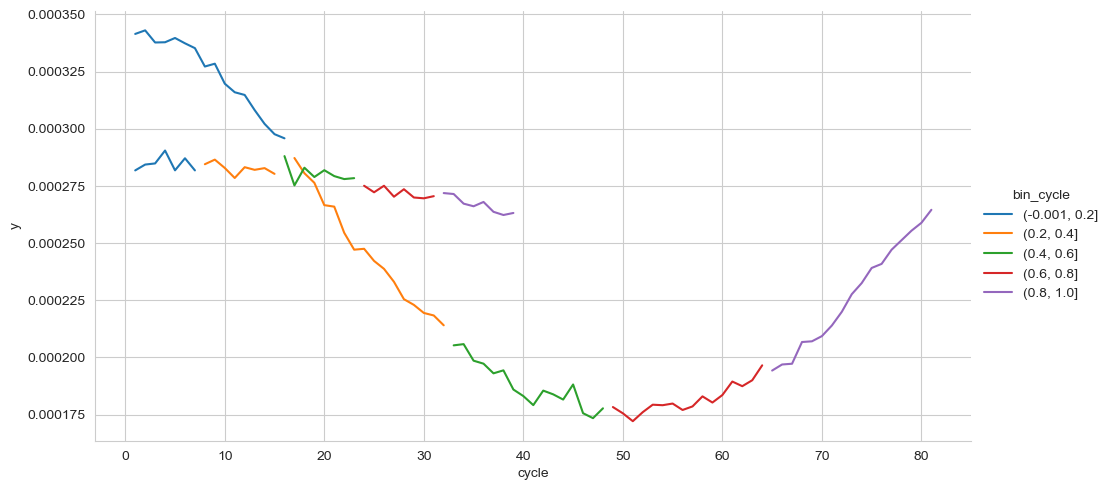

In [75]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id.isin([1, 240]), : ], 
            x='cycle', y='y', kind='line', hue='bin_cycle',
            estimator=None, units='trial_id', aspect=2)

plt.show()

However, even though `trial_id == 240` reached a greater number of cycles, each segment is 20% of the trial! Plotting both trials in terms of `norm_cycle` shows the colored segments "line up"!

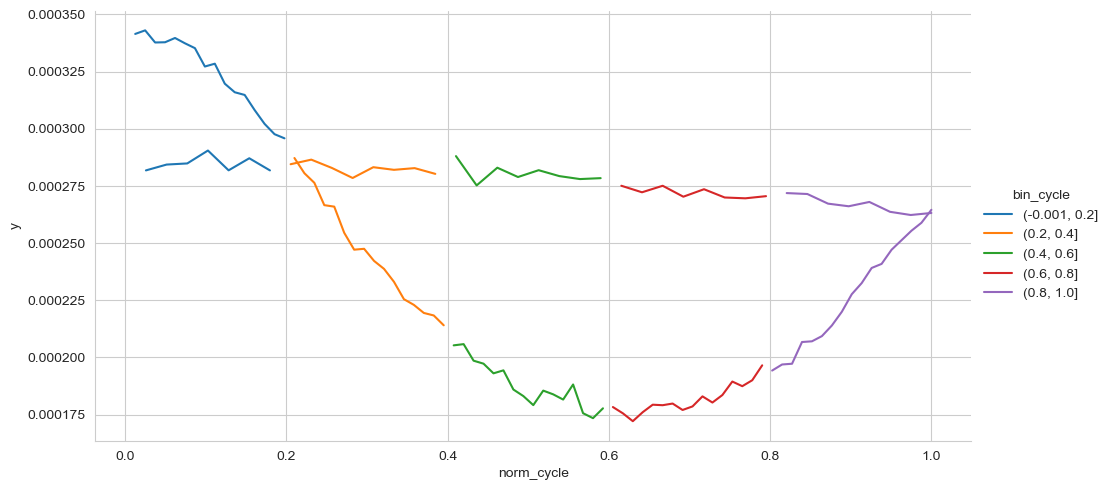

In [76]:
sns.relplot(data = trial_outputs_b.loc[ trial_outputs_b.trial_id.isin([1, 240]), : ], 
            x='norm_cycle', y='y', kind='line', hue='bin_cycle',
            estimator=None, units='trial_id', aspect=2)

plt.show()

**Why does this matter?**

Each trial can now be summarized within each segment! This is accomplished by grouping by `trial_id` **and** `bin_cycle`.

In [78]:
trial_y_bin_summary = trial_outputs_b.groupby(['trial_id', 'bin_cycle']).\
aggregate(num_rows = ('cycle', 'size'),
          num_cycles = ('cycle', 'max'),
          y_avg = ('y', 'mean'),
          y_med = ('y', 'median'),
          y_min = ('y', 'min'),
          y_max = ('y', 'max'),
          y_sd = ('y', 'std')).\
reset_index()

In [79]:
trial_y_bin_summary

,trial_id,bin_cycle,num_rows,num_cycles,y_avg,y_med,y_min,y_max,y_sd
0,1,"(-0.001, 0.2]",7,7,0.000285,0.000284,0.000282,0.000290,0.000003
1,1,"(0.2, 0.4]",8,15,0.000283,0.000283,0.000278,0.000286,0.000002
2,1,"(0.4, 0.6]",8,23,0.000280,0.000279,0.000275,0.000288,0.000004
3,1,"(0.6, 0.8]",8,31,0.000272,0.000271,0.000270,0.000275,0.000002
4,1,"(0.8, 1.0]",8,39,0.000267,0.000267,0.000262,0.000272,0.000004
...,...,...,...,...,...,...,...,...,...
1195,240,"(-0.001, 0.2]",16,16,0.000324,0.000328,0.000296,0.000343,0.000016
1196,240,"(0.2, 0.4]",16,32,0.000246,0.000245,0.000214,0.000287,0.000024
1197,240,"(0.4, 0.6]",16,48,0.000188,0.000186,0.000173,0.000206,0.000010
1198,240,"(0.6, 0.8]",16,64,0.000182,0.000180,0.000172,0.000197,0.000006


We're almost done. The summarized DataFrame is LONG-FORMAT. However, if we want to CLUSTER the trials by the summary stats then we need to have the data in WIDE FORMAT. We therefore need to RESHAPE from LONG to WIDE! This is the opposite of RESHAPING WIDE to LONG! The `.melt()` function ONLY reshapes WIDE to LONG. The opposite function is `.pivot()`. The `.pivot()` function reshapes LONG to WIDE. These two methods, `.melt()` and `.pivot()` are discussed in more detail in CMPINF 2110.

Let's focus the RESHAPING efforts on a single summary stat, `y_avg`, the AVERAGE continuous output in each segment. The `.pivot()` method requires identifying which column defines one ROW in the new wide format data, which column identifies the new COLUMN names in the new wide format data, and lastly which column stores the VALUES that will be placed in each new COLUMN. These arguments are `index`, `columns`, and `values`, respectively. Reshaping the `y_avg` values to WIDE FORMAT for each segment requires specifying `index='trial_id'`, `columns='bin_cycle'`, and `values='y_avg'`. 

In [80]:
trial_y_bin_summary.pivot( index='trial_id', columns='bin_cycle', values='y_avg')

bin_cycle,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
trial_id,,,,,
1,0.000285,0.000283,0.000280,0.000272,0.000267
2,0.000349,0.000343,0.000329,0.000311,0.000290
3,0.000284,0.000284,0.000280,0.000274,0.000269
4,0.000350,0.000341,0.000331,0.000313,0.000293
5,0.000290,0.000289,0.000285,0.000278,0.000274
...,...,...,...,...,...
236,0.000287,0.000230,0.000214,0.000228,0.000285
237,0.000294,0.000243,0.000217,0.000214,0.000239
238,0.000314,0.000219,0.000180,0.000219,0.000312


As shown above, there are 240 rows in the reshaped data! The columns contain the AVERAGE `y` value in each segment! The `trial_id` is the `.index` attribute and so resetting the index "brings" `trial_id` back as a "regular" column.

In [86]:
trial_y_bin_summary.pivot( index='trial_id', columns='bin_cycle', values='y_avg').\
reset_index()

bin_cycle,trial_id,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,1,0.000285,0.000283,0.000280,0.000272,0.000267
1,2,0.000349,0.000343,0.000329,0.000311,0.000290
2,3,0.000284,0.000284,0.000280,0.000274,0.000269
3,4,0.000350,0.000341,0.000331,0.000313,0.000293
4,5,0.000290,0.000289,0.000285,0.000278,0.000274
...,...,...,...,...,...,...
235,236,0.000287,0.000230,0.000214,0.000228,0.000285
236,237,0.000294,0.000243,0.000217,0.000214,0.000239
237,238,0.000314,0.000219,0.000180,0.000219,0.000312
238,239,0.000314,0.000219,0.000180,0.000218,0.000313


Unfortunately, the `.columns` attribute now has an "odd" name associate with it. The "name" of the `.columns` is `bin_cycle`. 

In [91]:
trial_y_bin_summary.pivot( index='trial_id', columns='bin_cycle', values='y_avg').\
reset_index().columns

Index(['trial_id', (-0.001, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8],
       (0.8, 1.0]],
      dtype='object', name='bin_cycle')

Let's assigned the WIDE FORMAT object to a new DataFrame.

In [96]:
trial_y_avg_wf = trial_y_bin_summary.pivot( index='trial_id', columns='bin_cycle', values='y_avg').\
reset_index()

The "odd" name for the `.columns` attribute is still present.

In [97]:
trial_y_avg_wf.columns.name

'bin_cycle'

Assign `None` to the `.columns.name` attribute.

In [98]:
trial_y_avg_wf.columns.name = None

The "odd" naming attribute is now removed!

In [99]:
trial_y_avg_wf

,trial_id,"(-0.001, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,1,0.000285,0.000283,0.000280,0.000272,0.000267
1,2,0.000349,0.000343,0.000329,0.000311,0.000290
2,3,0.000284,0.000284,0.000280,0.000274,0.000269
3,4,0.000350,0.000341,0.000331,0.000313,0.000293
4,5,0.000290,0.000289,0.000285,0.000278,0.000274
...,...,...,...,...,...,...
235,236,0.000287,0.000230,0.000214,0.000228,0.000285
236,237,0.000294,0.000243,0.000217,0.000214,0.000239
237,238,0.000314,0.000219,0.000180,0.000219,0.000312
238,239,0.000314,0.000219,0.000180,0.000218,0.000313


The columns besides `trial_id` now correspond to the AVERAGE value in each trial segment!

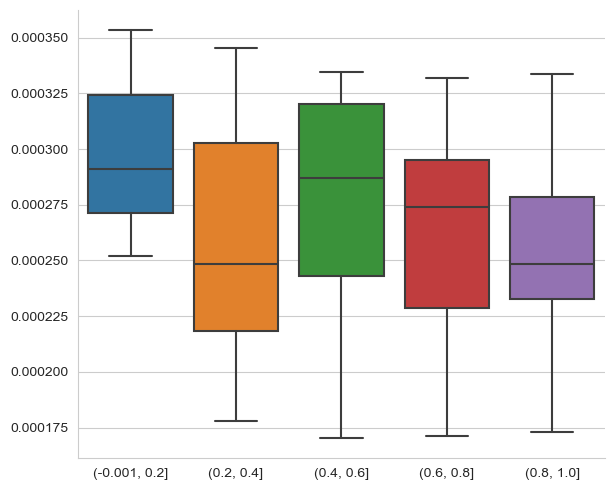

In [101]:
sns.catplot(data = trial_y_avg_wf.drop(columns=['trial_id']), kind='box', aspect=1.25)

plt.show()

Accessing the columns those is strange and tedious. The actual names are NOT what you think they are!

In [112]:
trial_y_avg_wf.columns

Index(['trial_id', (-0.001, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8],
       (0.8, 1.0]],
      dtype='object')

For example, the interval between 0.2 and 0.4 is actually named:

In [113]:
trial_y_avg_wf.columns[2]

Interval(0.2, 0.4, closed='right')

Thus, you need to use that odd syntax assign that column within a figure.

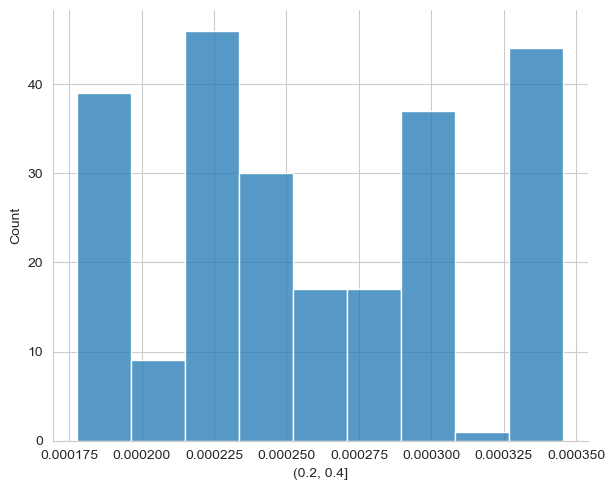

In [116]:
sns.displot(data = trial_y_avg_wf, x=trial_y_avg_wf.columns[2], kind='hist', aspect=1.25)

plt.show()

Since this is really strange, I recommend changing the names to make manipulating the data easier.

In [117]:
trial_y_avg_wf.columns

Index(['trial_id', (-0.001, 0.2], (0.2, 0.4], (0.4, 0.6], (0.6, 0.8],
       (0.8, 1.0]],
      dtype='object')

For example, the names can be changed to letters.

In [122]:
trial_y_avg_wf.columns = ['trial_id', 'A_avg', 'B_avg', 'C_avg', 'D_avg', 'E_avg']

In [123]:
trial_y_avg_wf.columns

Index(['trial_id', 'A_avg', 'B_avg', 'C_avg', 'D_avg', 'E_avg'], dtype='object')

Now it is easy to identify the second segment! The histogram below shows the DISTRIBUTION of the AVERAGE `y` value within the second segment across all trials!

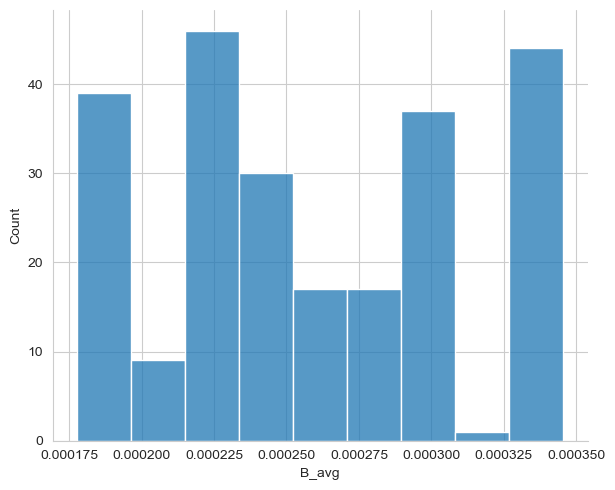

In [124]:
sns.displot(data = trial_y_avg_wf, x='B_avg', kind='hist', aspect=1.25)

plt.show()

The pairs plot below reveals the relationships between the AVERAGES in each of the 5 segments.

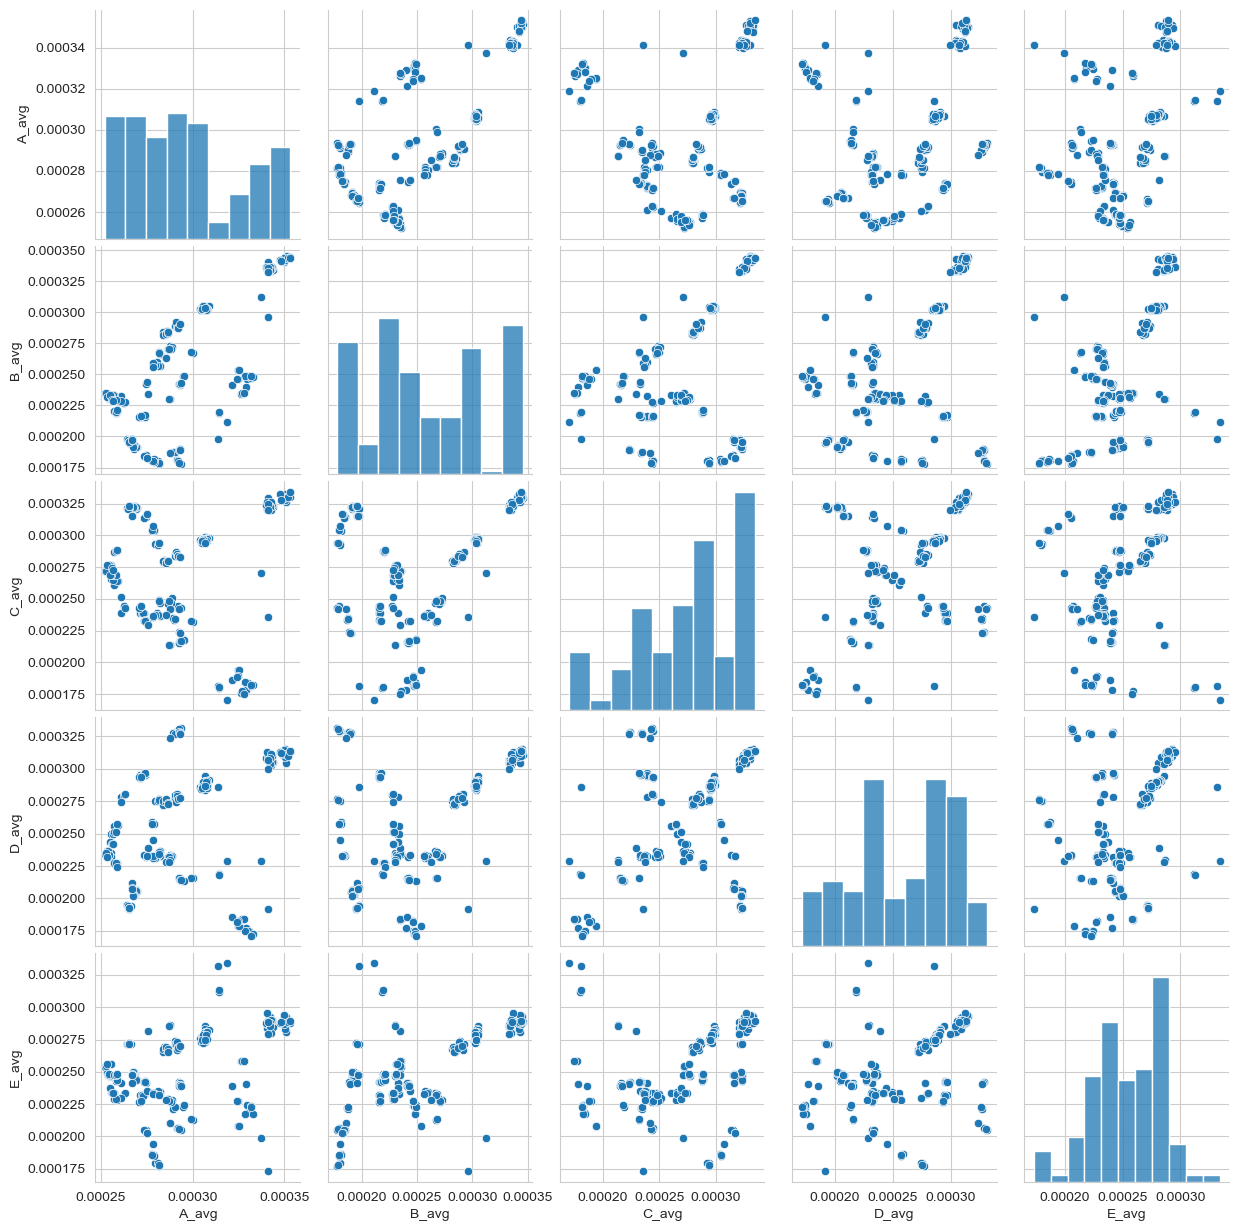

In [125]:
sns.pairplot(data = trial_y_avg_wf.drop(columns=['trial_id']))

plt.show()

You can do similar actions for the other summary statistics and then merge them together!

The complicated CURVES have been SUMMARIZED and are thus easier to work with!

This let's you attempt to cluster the trials based on the continuous output!